<!-- ---
title: How to use ParamScheduler with Ignite
date: 2021-10-11
downloads: true
weight: 7
downloads: true
sidebar: true
tags:
  - param scheduler
--- -->

# How to use ParamScheduler with Ignite

In [1]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import ast

In [2]:
import torch
from torch.optim import SGD

This notebook aims at presenting the use of ignite parameter schedulers.

See the [PyTorch-Ignite implementation](https://github.com/pytorch/ignite/blob/master/ignite/handlers/param_scheduler.py) and [documentation](https://pytorch.org/ignite/master/contrib/handlers.html#module-ignite.handlers.param_scheduler) as well as the [PyTorch documentation](https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate).

# `PyTorch` schedulers

We use the `LRScheduler` tool of `PyTorch-Ignite` which allows to easily integrate the schedulers of `PyTorch` and in particular to display the values.

In [3]:
from ignite.handlers import LRScheduler

> Beware that not all `PyTorch` schedulers are compatible because they have more or less exotic modes.

In [4]:
from torch.optim.lr_scheduler import (
    StepLR,
    ExponentialLR,
    CosineAnnealingLR,
    MultiStepLR,
    LambdaLR,
    MultiplicativeLR,
    CyclicLR,
    OneCycleLR
    # ReduceLROnPlateau : not compatible
    # CosineAnnealingWarmRestarts : not compatible
)

In [5]:
def print_optimizer(cls, num_events=50, lr=1.0, *args, **kwargs):
    optimizer = SGD(params=[torch.zeros(10)], lr=lr)
    lr_scheduler = cls(optimizer=optimizer, *args, **kwargs)
    LRScheduler.plot_values(num_events=num_events, lr_scheduler=lr_scheduler)
    plt.title("{}".format(cls))
    plt.show()

##  LambdaLR

See the [documentation](https://pytorch.org/docs/stable/generated/torch.optim.lr_scheduler.LambdaLR.html#torch.optim.lr_scheduler.LambdaLR).

In [6]:
def print_lambdalr(**kwargs):
    print_optimizer(LambdaLR, lr_lambda=lambda epoch: 1 / (epoch+1), **kwargs)
    
lambdalr_params = {
    "lr": (0.01, 0.1, 0.01), 
    "num_events": (5, 100, 5),
}

_ = widgets.interact(print_lambdalr, **lambdalr_params)

interactive(children=(FloatSlider(value=0.05, description='lr', max=0.1, min=0.01, step=0.01), IntSlider(value…

## MultiplicativeLR

See the [documentation](https://pytorch.org/docs/stable/generated/torch.optim.lr_scheduler.MultiplicativeLR.html#torch.optim.lr_scheduler.MultiplicativeLR).

In [7]:
def print_multiplicativelr(factor, **kwargs):
    print_optimizer(MultiplicativeLR, lr_lambda=lambda epoch: factor, **kwargs)

multiplicativelr_params = {
    "lr": (0.01, 0.1, 0.01), 
    "num_events": (5, 100, 5), 
    "factor": (0.05, 1.0, 0.05),
}
    
_ = widgets.interact(print_multiplicativelr, **multiplicativelr_params)

interactive(children=(FloatSlider(value=0.5, description='factor', max=1.0, min=0.05, step=0.05), FloatSlider(…

## CyclicLR

In [8]:
def print_cycliclr(**kwargs):
    print_optimizer(CyclicLR, **kwargs)

cycliclr_params = {
    "base_lr": (0.01, 0.1, 0.01),
    "max_lr": (0.01, 0.05, 0.01), 
    "num_events": (5, 100, 5), 
    "step_size_up": (1, 10, 1),
    "step_size_down": (1, 10, 1),
    "mode": ['triangular', 'triangular2', 'exp_range'],
    "gamma": (0.1, 2.0, 0.01),
}
    
_ = widgets.interact(print_cycliclr, **cycliclr_params)

interactive(children=(FloatSlider(value=0.05, description='base_lr', max=0.1, min=0.01, step=0.01), FloatSlide…

## OneCycleLR

See the [documentation](https://pytorch.org/docs/stable/generated/torch.optim.lr_scheduler.OneCycleLR.html#torch.optim.lr_scheduler.OneCycleLR).

In [9]:
def print_onecyclelr(**kwargs):
    print_optimizer(OneCycleLR, **kwargs, num_events=kwargs["total_steps"])

onecyclelr_params = {
    "max_lr": (0.01, 0.05, 0.01), 
    "total_steps": (1, 100, 1),
    "pct_start": (0.1, 1.0, 0.1),
    "anneal_strategy": ['cos', 'linear'],
}   
    
_ = widgets.interact(print_onecyclelr, **onecyclelr_params)

interactive(children=(FloatSlider(value=0.02, description='max_lr', max=0.05, min=0.01, step=0.01), IntSlider(…

## StepLR

See the [documentation](https://pytorch.org/docs/stable/generated/torch.optim.lr_scheduler.StepLR.html#torch.optim.lr_scheduler.StepLR).

In [10]:
def print_steplr(**kwargs):
    print_optimizer(StepLR, **kwargs)

steplr_params = {
    "lr": (0.01, 0.1, 0.01), 
    "num_events": (5, 100, 5),
    "step_size": (1, 10, 1), 
    "gamma": (0.01, 1.0, 0.01),
}   
    
_ = widgets.interact(print_steplr, **steplr_params)

interactive(children=(FloatSlider(value=0.05, description='lr', max=0.1, min=0.01, step=0.01), IntSlider(value…

## ExponentialLR

See the [documentation](https://pytorch.org/docs/stable/generated/torch.optim.lr_scheduler.ExponentialLR.html#torch.optim.lr_scheduler.ExponentialLR).

In [11]:
def print_exponentiallr(**kwargs):
    print_optimizer(ExponentialLR, **kwargs)

exponentiallr_params = {
    "lr": (0.01, 0.1, 0.01), 
    "num_events": (5, 100, 5),
    "gamma": (0.01, 1.0, 0.01),
}   
    
_ = widgets.interact(print_exponentiallr, **exponentiallr_params)

interactive(children=(FloatSlider(value=0.05, description='lr', max=0.1, min=0.01, step=0.01), IntSlider(value…

## CosineAnnealingLR

See the [documentation](https://pytorch.org/docs/stable/generated/torch.optim.lr_scheduler.CosineAnnealingLR.html#torch.optim.lr_scheduler.CosineAnnealingLR).

In [12]:
def print_cosineannealinglr(**kwargs):
    print_optimizer(CosineAnnealingLR, **kwargs)

cosineannealinglr_params = {
    "lr": (0.01, 0.1, 0.01), 
    "num_events": (5, 100, 5),
    "T_max": (1, 20, 1),
    "eta_min": (0.0, 1.0, 0.1),
}   
    
_ = widgets.interact(print_cosineannealinglr, **cosineannealinglr_params)

interactive(children=(FloatSlider(value=0.05, description='lr', max=0.1, min=0.01, step=0.01), IntSlider(value…

## MultiStepLR

See the [documentation](https://pytorch.org/docs/stable/generated/torch.optim.lr_scheduler.MultiStepLR.html#torch.optim.lr_scheduler.MultiStepLR).

In [13]:
def print_multisteplr(**kwargs):
    kwargs["milestones"] = list(ast.literal_eval(kwargs["milestones"]))
    print_optimizer(MultiStepLR, **kwargs)

multisteplr_params = {
    "lr": (0.01, 0.1, 0.01), 
    "num_events": (5, 100, 5),
    "milestones": "10, 30, 40",
    "gamma": (0.01, 1.0, 0.01),
}   
    
_ = widgets.interact(print_multisteplr, **multisteplr_params)

interactive(children=(FloatSlider(value=0.05, description='lr', max=0.1, min=0.01, step=0.01), IntSlider(value…

# `PyTorch-Ignite` Schedulers

Each scheduler can apply on a part of the parameters associated with the optimizer. This is a strong difference with `PyTorch`. On the other hand, there is an operator to concatenate schedulers. 

In [14]:
from ignite.contrib.handlers import (
    LinearCyclicalScheduler,
    PiecewiseLinear,
    CosineAnnealingScheduler
)

In [15]:
def plot_values(cls, **kwargs):
    cls.plot_values(**kwargs)
    plt.title("{}".format(cls))
    plt.show()

# LinearCyclicalScheduler

See the [documentation](https://pytorch.org/ignite/generated/ignite.handlers.param_scheduler.LinearCyclicalScheduler.html#ignite.handlers.param_scheduler.LinearCyclicalScheduler).

In [16]:
def print_linearcyclicalscheduler(**kwargs):
    plot_values(LinearCyclicalScheduler, param_name="lr", **kwargs)
    
linearcyclicalscheduler_params = {
    "num_events": (5, 50, 1),
    "start_value": (0.1, 1., 0.01),
    "end_value": (0., 0.1, 0.001),
    "cycle_size": (0, 20, 1),
}

_ = widgets.interact(print_linearcyclicalscheduler, **linearcyclicalscheduler_params)

interactive(children=(IntSlider(value=27, description='num_events', max=50, min=5), FloatSlider(value=0.55, de…

## PiecewiseLinear

See the [documentation](https://pytorch.org/ignite/generated/ignite.handlers.param_scheduler.PiecewiseLinear.html#ignite.handlers.param_scheduler.PiecewiseLinear).

In [17]:
def print_piecewiselinear(**kwargs):
    kwargs["milestones_values"] = list(ast.literal_eval(kwargs["milestones_values"]))
    plot_values(PiecewiseLinear, param_name="lr", **kwargs)
    
piecewiselinear_params = {
    "num_events": (5, 100, 1),
    "milestones_values": "(10, 0.5), (20, 0.45), (21, 0.3), (30, 0.1), (40, 0.1)",
}

_ = widgets.interact(print_piecewiselinear, **piecewiselinear_params)

interactive(children=(IntSlider(value=52, description='num_events', min=5), Text(value='(10, 0.5), (20, 0.45),…

## CosineAnnealingScheduler

See the [documentation](https://pytorch.org/ignite/generated/ignite.handlers.param_scheduler.CosineAnnealingScheduler.html#ignite.handlers.param_scheduler.CosineAnnealingScheduler).

In [18]:
def print_cosineannealingscheduler(**kwargs):
    plot_values(CosineAnnealingScheduler, param_name="lr", **kwargs)
    
cosineannealingscheduler_params = {
    "num_events": (5, 150, 1),
    "start_value": (0.1, 2.0, 0.1),
    "end_value": (0.001, 0.01, 0.001),
    "cycle_size": (1, 20, 1),
    "start_value_mult": (0.0, 1.9, 0.05),
    "end_value_mult": (0.0, 3.0, 0.05),
}

_ = widgets.interact(print_cosineannealingscheduler, **cosineannealingscheduler_params)

interactive(children=(IntSlider(value=77, description='num_events', max=150, min=5), FloatSlider(value=1.0, de…

## Warmup

See the [documentation](https://pytorch.org/ignite/generated/ignite.handlers.param_scheduler.create_lr_scheduler_with_warmup.html#ignite.handlers.param_scheduler.create_lr_scheduler_with_warmup).

In [19]:
from ignite.contrib.handlers import create_lr_scheduler_with_warmup

In [20]:
def print_warmup_optimizer(num_events=50, **kwargs):
    optimizer = SGD(params=[torch.zeros(10)], lr=kwargs["warmup_end_value"])
    lr_scheduler = ExponentialLR(optimizer=optimizer, gamma=kwargs["gamma"])
    lr_values = [None] * num_events
    del kwargs["gamma"]
    create_lr_scheduler_with_warmup(
        lr_scheduler=lr_scheduler,
        **kwargs,
        output_simulated_values=lr_values,
    )
    lr_values = np.array(lr_values)
    plt.plot(lr_values[:, 0], lr_values[:, 1], label="learning rate")
    plt.title("create_lr_scheduler_with_warmup + ExponentialLR")
    plt.show()
    
warmup_params = {
    "num_events": (5, 150, 1),
    "warmup_start_value": (0.01, 0.5, 0.01),
    "warmup_end_value": (0.5, 2.0, 0.1),
    "warmup_duration": (5, 20, 1),
    "gamma": (0.5, 1.0, 0.01),
}

_ = widgets.interact(print_warmup_optimizer, **warmup_params)

interactive(children=(IntSlider(value=50, description='num_events', max=150, min=5), FloatSlider(value=0.25, d…

## Example of an advanced case using multiparameters

In the following case, we consider an optimizer with 3 groups of parameters. We associate a `PyTorch` scheduler on each group with warmup.

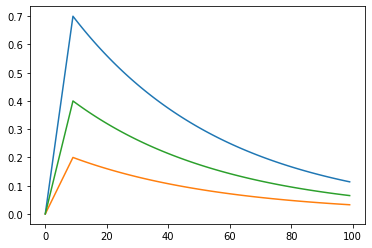

In [21]:
t1 = torch.tensor([0.0])
t2 = torch.tensor([0.0])
t3 = torch.tensor([0.0])

opt = torch.optim.SGD([
    {"params": [t1], "lr": 0.7, "weight_decay": 0.0},
    {"params": [t2], "lr": 0.2, "weight_decay": 0.0001},
    {"params": [t3], "lr": 0.4, "weight_decay": 0.01},
])

torch_lr_scheduler = ExponentialLR(optimizer=opt, gamma=0.98)
lr_values = [None] * 100
scheduler = create_lr_scheduler_with_warmup(torch_lr_scheduler,
                                            warmup_start_value=0.0,
                                            warmup_duration=10,
                                            output_simulated_values=lr_values)

lr_values = np.array(lr_values)
# lr_values.shape = (100, 3) <=> event index, lr for group 1, lr for group 2
# Plot simulated values
plt.plot(lr_values[:, 0], lr_values[:, 1], label="learning rate g1")
plt.plot(lr_values[:, 0], lr_values[:, 2], label="learning rate g2")
plt.plot(lr_values[:, 0], lr_values[:, 3], label="learning rate g3")
plt.show()